<a href="https://colab.research.google.com/github/AoufNihed/Energy_Consumption/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

get started

In [46]:

path='/content/drive/MyDrive/Data_set/AEP_hourly.csv'
df=pd.read_csv(path)

In [47]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [48]:
df.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [50]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [51]:
df.isna().sum()

Datetime    0
AEP_MW      0
dtype: int64

**Visulation**

In [52]:
df.value_counts()

Datetime             AEP_MW 
2004-10-01 01:00:00  12379.0    1
2013-12-22 10:00:00  12906.0    1
2013-12-22 22:00:00  13964.0    1
2013-12-22 21:00:00  14335.0    1
2013-12-22 20:00:00  14474.0    1
                               ..
2009-05-12 16:00:00  14324.0    1
2009-05-12 15:00:00  14525.0    1
2009-05-12 14:00:00  14662.0    1
2009-05-12 13:00:00  14648.0    1
2018-08-03 00:00:00  14809.0    1
Name: count, Length: 121273, dtype: int64

In [53]:
df.Datetime.unique()

array(['2004-12-31 01:00:00', '2004-12-31 02:00:00',
       '2004-12-31 03:00:00', ..., '2018-01-01 22:00:00',
       '2018-01-01 23:00:00', '2018-01-02 00:00:00'], dtype=object)

In [54]:
import pandas as pd

dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week #  to extract the week number
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [55]:
dataset.head()

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [56]:
dataset.tail()

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2018-01-01 20:00:00,21089.0,1,2018,2018-01-01,20:00:00,1,Monday
2018-01-01 21:00:00,20999.0,1,2018,2018-01-01,21:00:00,1,Monday
2018-01-01 22:00:00,20820.0,1,2018,2018-01-01,22:00:00,1,Monday
2018-01-01 23:00:00,20415.0,1,2018,2018-01-01,23:00:00,1,Monday
2018-01-02 00:00:00,19993.0,1,2018,2018-01-02,00:00:00,1,Tuesday


In [57]:
dataset.Year.unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int32)

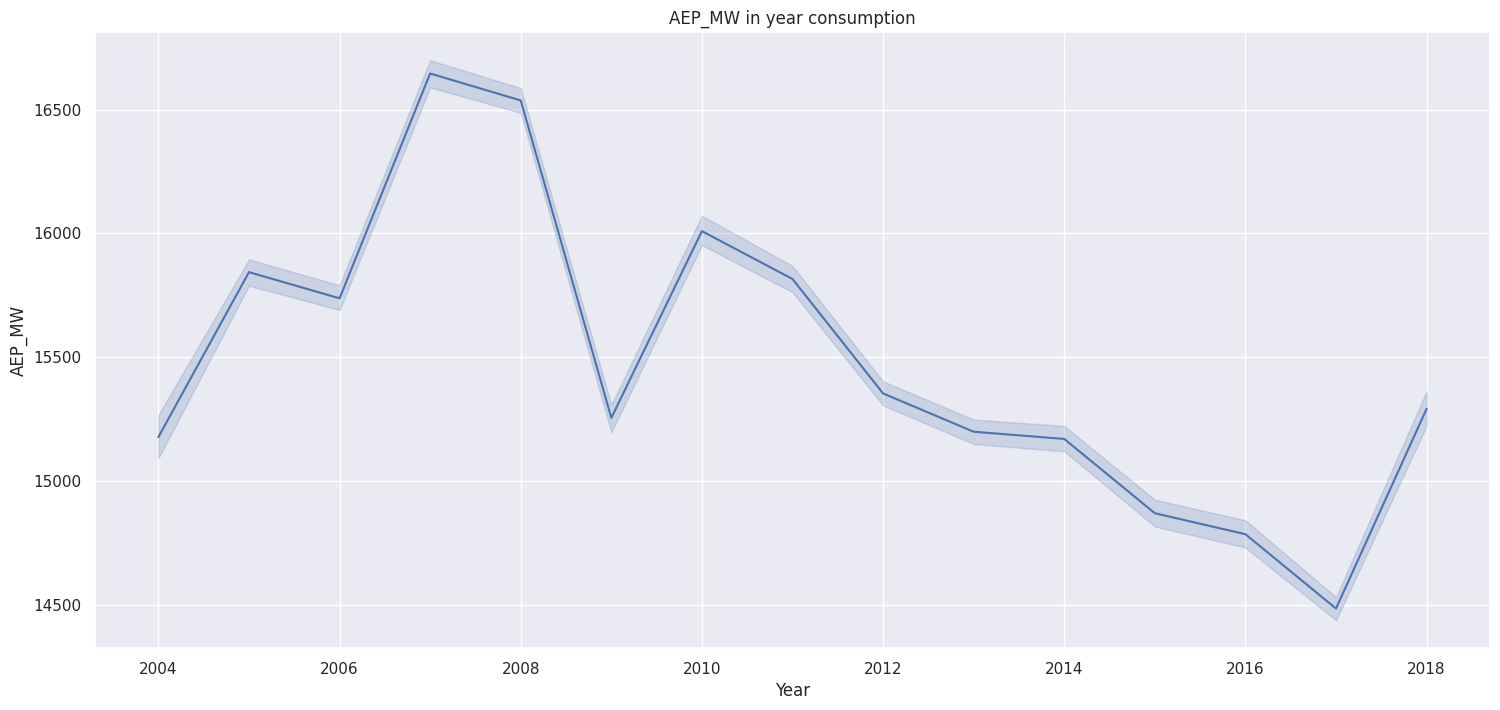

In [58]:
sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.title('AEP_MW in year consumption')
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.show()

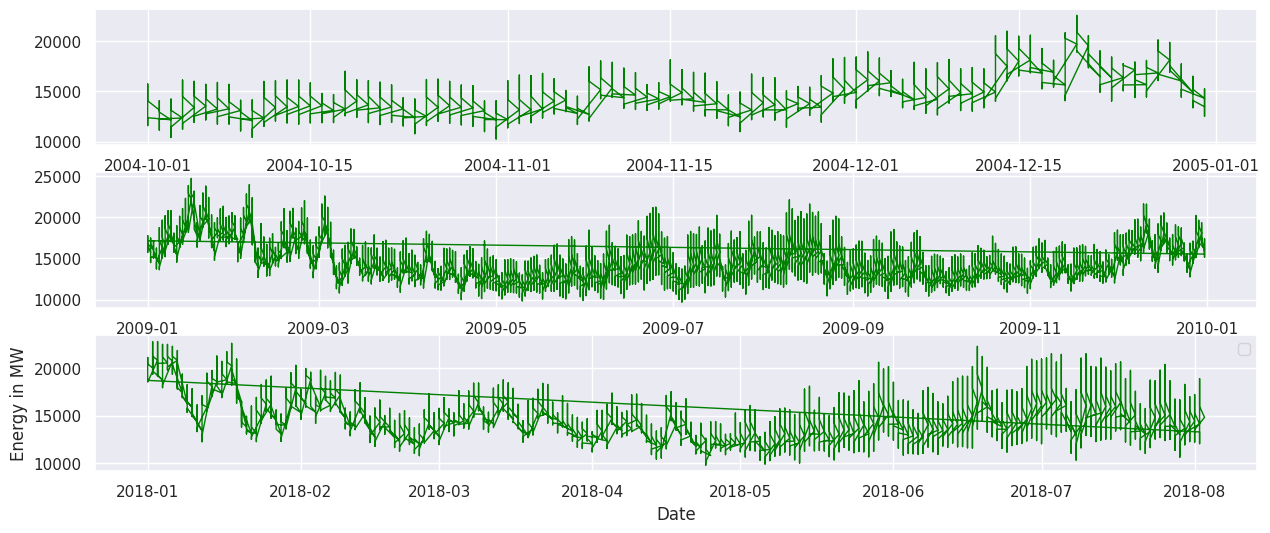

In [59]:
fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)



y_2004 = dataset[dataset["Year"] == 2004]["AEP_MW"].to_list()
x_2004 = dataset[dataset["Year"] == 2004]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1)

y_2009 = dataset[dataset["Year"] == 2009]["AEP_MW"].to_list()
x_2009 = dataset[dataset["Year"] == 2009]["Date"].to_list()
ax2.plot(x_2009, y_2009, color="green", linewidth=1)

y_2018 = dataset[dataset["Year"] == 2018]["AEP_MW"].to_list()
x_2018 = dataset[dataset["Year"] == 2018]["Date"].to_list()
ax3.plot(x_2018, y_2018, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-60-85c84b356868>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


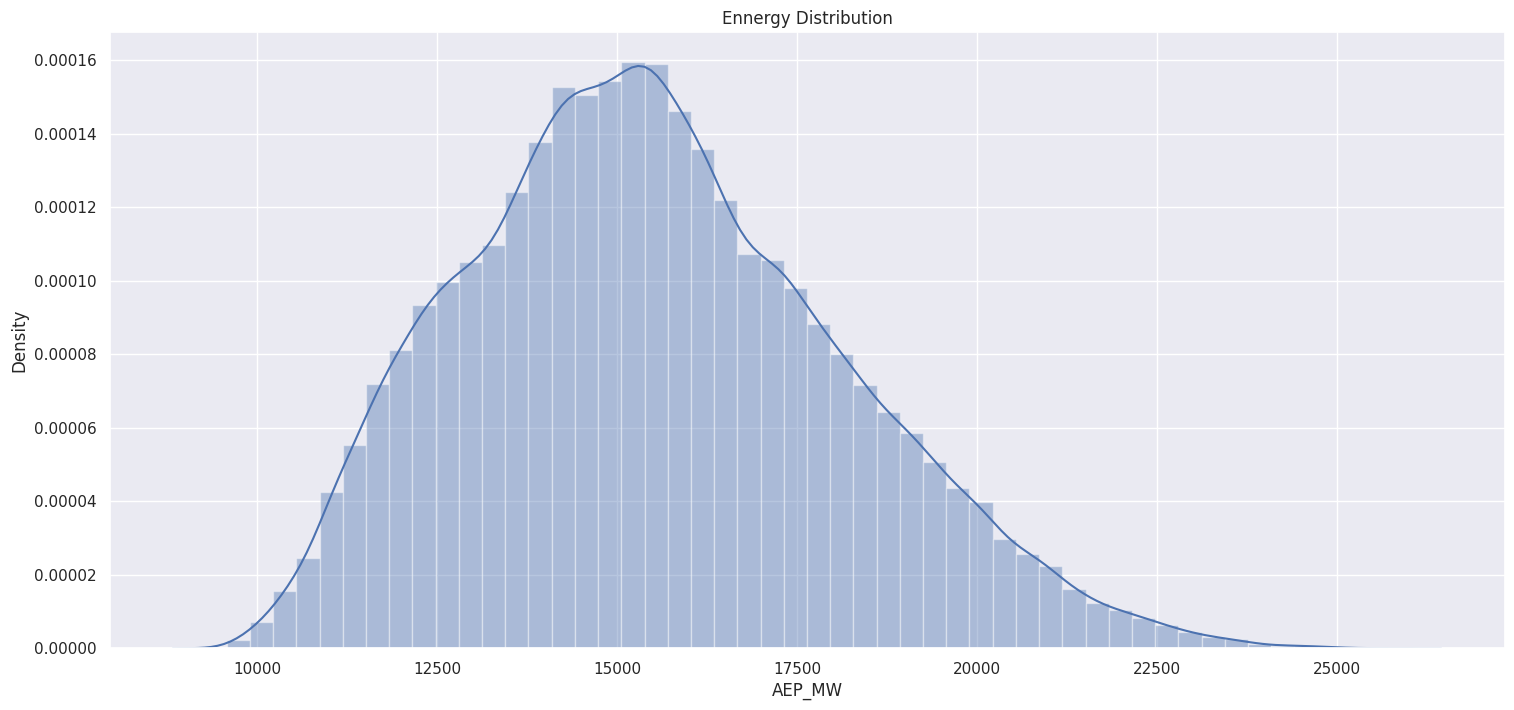

In [60]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")
plt.show(
)